In [5]:
# !pip install einops
# !pip install matplotlib

In [ ]:
## /content/drive/MyDrive/Text to Text/translation_english_data.docx

## /content/drive/MyDrive/Text to Text/translation_inuktitut_data.docx



---



---



---



In [1]:
import pandas as pd
import numpy as np

import numpy as np

import typing
from typing import Any, Tuple

import einops
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import tensorflow as tf

In [2]:
#@title
class ShapeChecker():
  def __init__(self):
    # Keep a cache of every axis-name seen
    self.shapes = {}

  def __call__(self, tensor, names, broadcast=False):
    if not tf.executing_eagerly():
      return

    parsed = einops.parse_shape(tensor, names)

    for name, new_dim in parsed.items():
      old_dim = self.shapes.get(name, None)
      
      if (broadcast and new_dim == 1):
        continue

      if old_dim is None:
        # If the axis name is new, add its length to the cache.
        self.shapes[name] = new_dim
        continue

      if new_dim != old_dim:
        raise ValueError(f"Shape mismatch for dimension: '{name}'\n"
                         f"    found: {new_dim}\n"
                         f"    expected: {old_dim}\n")

In [3]:
df=pd.read_csv('parallel_71414.csv')
df

,English,inuktitut
0,hello,", ᐊᐃ’"
1,"""A"" is the first letter of the alphabet.",", ""A"" , ᓯᕗᓪᓕᖅᐹᖑᕗᖅ , ᑎᑎᖅᑲᖅ , alphabet−ᒥᑦ."
2,"""Are those your books?"" ""No, they aren't.""",", ""ᑖᒃᑯᐊ , ᐅᖃᓕᒫᒐᖁᑎᑎᑦ?"" , ""ᐋᒃᑲ, , ᑕᐃᒪᐃᙱᑦᑐᑦ."""
3,"""Are you from Australia?"" asked the Filipino.",", "" , ᐋᔅᑐᕇᓕᐊᒥᙶᖅᐱᑦ?"" , ᐊᐱᕆᓪᓗᑎᑦ , ᐱᓕᐲᓄᒥᑦ."
4,"""Could you move over a little?"" ""Oh, sorry. I ...",", ""ᓅᓚᐅᑲᒍᓐᓇᖅᐲᑦ?"" , ""ᒪᒥᐊᓇᖅ. , ᐅᔾᔨᕈᓱᓚᐅᙱᑦᑐᖓ , ᐃᓂᒃ..."
...,...,...
103958,Zebras have stripes.,0
103959,Zero comes before one.,0
103960,Zero is a special number.,0
103961,Zimbabwe was once a colony of Britain.,0


In [4]:
df=pd.read_csv('parallel_data.csv')
df

,English,inuktitut
0,hello,", ᐊᐃ’"
1,"""A"" is the first letter of the alphabet.",", ""A"" , ᓯᕗᓪᓕᖅᐹᖑᕗᖅ , ᑎᑎᖅᑲᖅ , alphabet−ᒥᑦ."
2,"""Are those your books?"" ""No, they aren't.""",", ""ᑖᒃᑯᐊ , ᐅᖃᓕᒫᒐᖁᑎᑎᑦ?"" , ""ᐋᒃᑲ, , ᑕᐃᒪᐃᙱᑦᑐᑦ."""
3,"""Are you from Australia?"" asked the Filipino.",", "" , ᐋᔅᑐᕇᓕᐊᒥᙶᖅᐱᑦ?"" , ᐊᐱᕆᓪᓗᑎᑦ , ᐱᓕᐲᓄᒥᑦ."
4,"""Could you move over a little?"" ""Oh, sorry. I ...",", ""ᓅᓚᐅᑲᒍᓐᓇᖅᐲᑦ?"" , ""ᒪᒥᐊᓇᖅ. , ᐅᔾᔨᕈᓱᓚᐅᙱᑦᑐᖓ , ᐃᓂᒃ..."
...,...,...
71174,Tom has begun to learn French.,", ᑖᒻ , ᐃᓕᓐᓂᐊᖅᐸᓪᓕᐊᓕᖅᑐᖅ , ᐅᐃᕖᑎᑐᑦ."
71175,Tom has begun writing a new book.,", ᑖᒻ , ᑎᑎᕋᖅᐸᓪᓕᐊᓕᖅᑐᖅ , ᓄᑖᒥᒃ , ᐅᖃᓕᒫᒐᕐᒥᒃ."
71176,Tom has betrayed me.,", ᑖᒻ , ᐅᕙᓐᓄᑦ , ᑐᓱᒋᔭᐅᓯᒪᕚᖓ."
71177,Tom has betrayed us.,", ᑖᒻ , ᑐᓱᕋᖅᑕᐅᔪᖅ."


In [5]:
df.shape

(71179, 2)

In [75]:
context_raw=np.array(df['English'])
context_raw

array(['hello', '"A" is the first letter of the alphabet.',
       '"Are those your books?" "No, they aren\'t."', ...,
       'Tom has betrayed me.', 'Tom has betrayed us.',
       'Tom has big ears.'], dtype=object)

In [81]:
target_raw=np.array(df['inuktitut'])
target_raw

array([' , ᐊᐃ’', ' , "A" , ᓯᕗᓪᓕᖅᐹᖑᕗᖅ , ᑎᑎᖅᑲᖅ , alphabet−ᒥᑦ.',
       ' , "ᑖᒃᑯᐊ , ᐅᖃᓕᒫᒐᖁᑎᑎᑦ?" , "ᐋᒃᑲ, , ᑕᐃᒪᐃᙱᑦᑐᑦ."', ...,
       ' , ᑖᒻ , ᐅᕙᓐᓄᑦ , ᑐᓱᒋᔭᐅᓯᒪᕚᖓ.', ' , ᑖᒻ , ᑐᓱᕋᖅᑕᐅᔪᖅ.',
       ' , ᑖᒻ , ᓯᐅᑎᕐᔪᐊᓕᒃ.'], dtype=object)

In [82]:
print(context_raw.shape,target_raw.shape)

(71179,) (71179,)


In [83]:
BUFFER_SIZE = len(context_raw)
BATCH_SIZE = 20

is_train = np.random.uniform(size=(len(target_raw),)) < 0.8

train_raw = (
    tf.data.Dataset
    .from_tensor_slices((context_raw[is_train], target_raw[is_train]))
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE))
val_raw = (
    tf.data.Dataset
    .from_tensor_slices((context_raw[~is_train], target_raw[~is_train]))
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE))

In [84]:
for example_context_strings, example_target_strings in train_raw.take(1):
  print(example_context_strings[:5])
  print()
  print(example_target_strings[:5])
  break

tf.Tensor(
[b'I had a good time in Boston.' b"I'll be there in a moment."
 b"He's always joking." b'Do you know anyone here?'
 b'I know what it means.'], shape=(5,), dtype=string)

tf.Tensor(
[b' , \xe1\x96\x81\xe1\x95\x95\xe1\x90\x8a\xe1\x93\xb1\xe1\x93\x9a\xe1\x90\x85\xe1\x96\x85\xe1\x91\x90\xe1\x96\x93 , \xe1\x90\xb9\xe1\x94\x85\xe1\x91\x95\xe1\x93\x90\xe1\x92\xa5.'
 b' , \xe1\x91\x95\xe1\x90\x83\xe1\x91\xb2\xe1\x93\x83\xe1\x91\xb2\xe1\x90\x83\xe1\x93\x90\xe1\x93\x87\xe1\x95\x90\xe1\x93\x82\xe1\x90\x8a\xe1\x95\x8b\xe1\x92\xaa.'
 b' , \xe1\x92\xa5\xe1\x91\x95\xe1\x90\x85\xe1\x91\x8e\xe1\x92\x8b\xe1\x96\x83\xe1\x91\xa6\xe1\x91\x95\xe1\x96\x85\xe1\x91\x95\xe1\x96\x93.'
 b' , \xe1\x96\x83\xe1\x90\x85\xe1\x94\xa8\xe1\x92\xaa\xe1\x94\xad\xe1\x96\x83\xe1\x96\x85\xe1\x90\xb2\xe1\x91\xa6 , \xe1\x91\xad\xe1\x93\x87\xe1\x92\xa5\xe1\x91\xad\xe1\x90\x8a\xe1\x96\x85 , \xe1\x90\x85\xe1\x95\x99\xe1\x93\x83\xe1\x91\x90\xe1\x92\xa5\xe1\x92\x83?'
 b' , \xe1\x96\x83\xe1\x90\x85\xe1\x94\xa8\xe1\x92\xaa\

Unicode normalization will be the first step in the text standardization function:

In [85]:
def tf_lower_and_split_punct(text):
  # Split accented characters.
  #text = tf_text.normalize_utf8(text, 'NFKD')
  text = tf.strings.lower(text)
  # Keep space, a to z, and select punctuation.
  text = tf.strings.regex_replace(text, '[^ a-z.?!,¿]', '')
  # Add spaces around punctuation.
  text = tf.strings.regex_replace(text, '[.?!,¿]', r' \0 ')
  # Strip whitespace.
  text = tf.strings.strip(text)

  text = tf.strings.join(['[START]', text, '[END]'], separator=' ')
  return text

In [86]:
def tf_lower_and_split_punct_inuktitut(text):
  text = tf.strings.join(['[START]', text, '[END]'], separator=' ')
  return text

#### Text Vectorization

This standardization function will be wrapped up in a `tf.keras.layers.TextVectorization` layer which will handle the vocabulary extraction and conversion of input text to sequences of tokens.

In [87]:
max_vocab_size = 5000

context_text_processor = tf.keras.layers.TextVectorization(
    standardize=tf_lower_and_split_punct,
    max_tokens=max_vocab_size,
    ragged=True)

In [88]:
context_text_processor.adapt(train_raw.map(lambda context, target: context))

# Here are the first 10 words from the vocabulary:
context_text_processor.get_vocabulary()[:10]

['', '[UNK]', '[START]', '[END]', '.', 'i', 'tom', 'to', 'the', 'you']

In [89]:
target_text_processor = tf.keras.layers.TextVectorization(
    standardize=tf_lower_and_split_punct_inuktitut,
    max_tokens=max_vocab_size,
    ragged=True)

target_text_processor.adapt(train_raw.map(lambda context, target: target))
target_text_processor.get_vocabulary()[:10]

['', '[UNK]', ',', '[START]', '[END]', 'ᑖᒻ', 'ᑕᒪᓐᓇ', 'ᑖᓐᓇ', 'ᒥᐊᓕ', 'ᖃᓄᖅ']

In [90]:
target_text_processor.get_vocabulary()

['',
 '[UNK]',
 ',',
 '[START]',
 '[END]',
 'ᑖᒻ',
 'ᑕᒪᓐᓇ',
 'ᑖᓐᓇ',
 'ᒥᐊᓕ',
 'ᖃᓄᖅ',
 'ᐊᒻᒪ',
 'ᖃᐅᔨᒪᔪᖓ',
 'ᓱᓕ',
 'ᑖᒻ.',
 'ᑭᓯᐊᓂ',
 'ᖃᐅᔨᔪᒪᕗᖓ',
 'ᐅᐃᕖᑎᑐᑦ',
 'ᑖᒃᑯᐊ',
 'ᐅᓪᓗᒥ',
 'ᑭᒃᑯᓕᒫᑦ',
 'ᑖᒻᒥᒃ.',
 'ᖃᐅᔨᒪᕕᑦ',
 'ᐃᓄᐃᑦ',
 'ᐅᕙᓐᓄᑦ',
 'ᒫᓐᓇ',
 'ᑖᒻᓗ',
 'ᐊᒻᒪᓗ',
 'ᖃᐅᑉᐸᑦ',
 'ᒥᐊᓕᒥᒃ',
 'ᑖᒥ',
 'ᑖᒻᐅᑉ',
 'ᐱᐅᒋᔭᕋ.',
 'ᐅᕙᓐᓂᒃ',
 'ᐃᒻᒪᖃ',
 'ᒥᐊᓕᐅᑉ',
 'ᖃᓄᕐᓕ',
 'ᒥᐊᓕᒥᒃ.',
 'ᓇᒻᒥᓂᖅ',
 'ᐊᒥᓱᓂᒃ',
 'ᑕᒪᕐᒥᒃ',
 'ᐱᐅᒋᔭᕋ',
 'ᑖᒻᒧᑦ.',
 'ᑕᐃᓐᓇ',
 'ᑖᒻᒧᑦ',
 'ᐅᖃᓕᒫᒐᖅ',
 'ᐅᓇ',
 'ᓄᑖᒥᒃ',
 'ᐊᒃᓱᐊᓗᒃ',
 'ᑭᓇᑐᐃᓐᓇᖅ',
 'ᓂᖀᑦ',
 'ᖃᓄᐃᒻᒪᑦ',
 'ᑖᒻ?',
 'ᖃᓄᑎᒋ',
 'ᐅᓪᓗᒥ.',
 'ᐊᑖᑕᒐ',
 'ᖃᔅᓯᓂᒃ',
 'ᐅᕙᖓ',
 'ᐄ,',
 'ᖃᐅᔨᒪᓐᖏᓚᖓ',
 'ᐃᓱᒪᕖᑦ',
 'ᐱᖓᓱᓂᒃ',
 'ᒥᐊᓕ.',
 'ᖁᔭᓐᓇᒦᒃ',
 'ᒪᕐᕉᓐᓂᒃ',
 'ᑕᐃᒫᒃ',
 'ᐊᑯᓂᐅᑎᒋᔪᖅ',
 'ᑖᒻᒥᒃ',
 'ᐅᓐᓄᒃ.',
 'ᐋᒡᒐᓘᓐᓃᑦ.',
 'ᖃᓪᓗᓈᑎᑐᑦ',
 'ᐅᐃᕖᑎᑐᑦ.',
 'ᖃᐅᔨᒪᙱᑦᑐᖓ',
 'ᖃᐅᔨᒪᓚᐅᙱᓐᓇᒪ',
 'ᒫᓐᓇ.',
 'ᑕᐃᒪᓐᓇ',
 'ᑕᕝᕙᓂ',
 'ᐃᓕᖕᓂᒃ',
 'ᕿᒻᒥᖅ',
 'ᐅᕙᓐᓄᑦ.',
 'ᑐᓂᓯᓚᐅᖅᑐᖅ',
 'ᖃᐅᔨᒪᓚᐅᖅᑐᖓ',
 'ᒥᒃᓵᓄᑦ.',
 'ᑲᓇᑕᐅᑉ',
 'ᐃᓚᖏᑦ',
 'ᐅᖃᐅᑎᓚᐅᖅᑕᕋ',
 'ᐅᖃᐅᑎᓗᒍ',
 'ᐅᕝᕙᓘᓐᓃᑦ',
 'ᐅᕙᑦᑎᓐᓂᒃ.',
 'ᒥᐊᓕᒧᑦ.',
 'ᑕᒫᓂ',
 'ᐹᔅᑕᓐᒥ.',
 'ᒪᒥᐊᓇᖅ',
 'ᐊᐱᕆᓚᐅᖅᑐᖅ',
 'ᐃᓕᓐᓂᒃ.',
 'ᑮᓇᐅᔭᓂᒃ',
 'ᐃᒻᒥᓂᒃ',
 'ᒪᒥᐊᓇᖅ,',
 'ᑭᓱᓕᒫᑦ',
 'ᖃᐅᑕᒫᑦ',
 'ᓂᐅᕕᓚᐅᖅᑐᖅ',

In [93]:
example_tokens = context_text_processor(example_context_strings)
example_tokens[:3, :]

<tf.RaggedTensor [[2, 5, 69, 10, 87, 67, 18, 74, 4, 3], [2, 51, 33, 55, 18, 10, 874, 4, 3],
 [2, 165, 143, 1163, 4, 3]]>

In [94]:
context_vocab = np.array(context_text_processor.get_vocabulary())
tokens = context_vocab[example_tokens[0].numpy()]
' '.join(tokens)

'[START] i had a good time in boston . [END]'

The returned token IDs are zero-padded. This can easily be turned into a mask:

The `process_text` function below converts the `Datasets` of strings, into  0-padded tensors of token IDs. It also converts from a `(context, target)` pair to an `((context, target_in), target_out)` pair for training with `keras.Model.fit`. Keras expects `(inputs, labels)` pairs, the inputs are the `(context, target_in)` and the labels are `target_out`. The difference between `target_in` and `target_out` is that they are shifted by one step relative to eachother, so that at each location the label is the next token.

In [95]:
def process_text(context, target):
  context = context_text_processor(context).to_tensor()
  target = target_text_processor(target)
  targ_in = target[:,:-1].to_tensor()
  targ_out = target[:,1:].to_tensor()
  return (context, targ_in), targ_out


train_ds = train_raw.map(process_text, tf.data.AUTOTUNE)
val_ds = val_raw.map(process_text, tf.data.AUTOTUNE)

Here is the first sequence of each, from the first batch:

In [96]:
for (ex_context_tok, ex_tar_in), ex_tar_out in train_ds.take(1):
  print(ex_context_tok[0, :10].numpy()) 
  print()
  print(ex_tar_in[0, :10].numpy()) 
  print(ex_tar_out[0, :10].numpy()) 

[   2   64  316 1257    4    3    0    0    0    0]

[3 2 6 2 1 0 0 0 0 0]
[2 6 2 1 4 0 0 0 0 0]




---



---



## The encoder/decoder

The following diagrams shows an overview of the model. In both the encoder is on the left, the decoder is on the right. At each time-step the decoder's output is combined with the encoder's output, to predict the next word. 

The original [left] contains a few extra connections that are intentionally omitted from this tutorial's model [right], as they are generally unnecessary, and difficult to implement. Those missing connections are:

1. Feeding the state from the encoder's RNN to the decoder's RNN
2. Feeding the attention output back to the RNN's input.






---



---


---



In [97]:
#Defining Constants

UNITS = 256

### The encoder

The goal of the encoder is to process the context sequence into a sequence of vectors that are useful for the decoder as it attempts to predict the next output for each timestep. Since the context sequence is constant, there is no restriction on how information can flow in the encoder, so use a bidirectional-RNN to do the processing:

The encoder:

1. Takes a list of token IDs (from `context_text_processor`).
3. Looks up an embedding vector for each token (Using a `layers.Embedding`).
4. Processes the embeddings into a new sequence (Using a bidirectional `layers.GRU`).
5. Returns the processed sequence. This will be passed to the attention head.

In [98]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, text_processor, units):
    super(Encoder, self).__init__()
    self.text_processor = text_processor
    self.vocab_size = text_processor.vocabulary_size()
    self.units = units
    
    # The embedding layer converts tokens to vectors
    self.embedding = tf.keras.layers.Embedding(self.vocab_size, units,
                                               mask_zero=True)

    # The RNN layer processes those vectors sequentially.
    self.rnn = tf.keras.layers.Bidirectional(
        merge_mode='sum',
        layer=tf.keras.layers.GRU(units,
                            # Return the sequence and state
                            return_sequences=True,
                            recurrent_initializer='glorot_uniform'))

  def call(self, x):
    shape_checker = ShapeChecker()
    shape_checker(x, 'batch s')

    # 2. The embedding layer looks up the embedding vector for each token.
    x = self.embedding(x)
    shape_checker(x, 'batch s units')

    # 3. The GRU processes the sequence of embeddings.
    x = self.rnn(x)
    shape_checker(x, 'batch s units')

    # 4. Returns the new sequence of embeddings.
    return x

  def convert_input(self, texts):
    texts = tf.convert_to_tensor(texts)
    if len(texts.shape) == 0:
      texts = tf.convert_to_tensor(texts)[tf.newaxis]
    context = self.text_processor(texts).to_tensor()
    context = self(context)
    return context

In [99]:
# Encode the input sequence.
encoder = Encoder(context_text_processor, UNITS)
ex_context = encoder(ex_context_tok)

print(f'Context tokens, shape (batch, s): {ex_context_tok.shape}')
print(f'Encoder output, shape (batch, s, units): {ex_context.shape}')

Context tokens, shape (batch, s): (20, 12)
Encoder output, shape (batch, s, units): (20, 12, 256)


### The attention layer

The attention layer lets the decoder access the information extracted by the encoder. It computes a vector from the entire context sequence, and adds that to the decoder's output. 

The simplest way you could calculate a single vector from the entire sequence would be to take the average across the sequence (`layers.GlobalAveragePooling1D`). An attention layer is similar, but calculates a **weighted** average across the context sequence. Where the weights are calculated from the combination of context and "query" vectors.

In [100]:
class CrossAttention(tf.keras.layers.Layer):
  def __init__(self, units, **kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(key_dim=units, num_heads=1, **kwargs)
    self.layernorm = tf.keras.layers.LayerNormalization()
    self.add = tf.keras.layers.Add()

  def call(self, x, context):
    shape_checker = ShapeChecker()
 
    shape_checker(x, 'batch t units')
    shape_checker(context, 'batch s units')

    attn_output, attn_scores = self.mha(
        query=x,
        value=context,
        return_attention_scores=True)
    
    shape_checker(x, 'batch t units')
    shape_checker(attn_scores, 'batch heads t s')
    
    # Cache the attention scores for plotting later.
    attn_scores = tf.reduce_mean(attn_scores, axis=1)
    shape_checker(attn_scores, 'batch t s')
    self.last_attention_weights = attn_scores

    x = self.add([x, attn_output])
    x = self.layernorm(x)

    return x

In [101]:
attention_layer = CrossAttention(UNITS)

# Attend to the encoded tokens
embed = tf.keras.layers.Embedding(target_text_processor.vocabulary_size(),
                                  output_dim=UNITS, mask_zero=True)
ex_tar_embed = embed(ex_tar_in)

result = attention_layer(ex_tar_embed, ex_context)

print(f'Context sequence, shape (batch, s, units): {ex_context.shape}')
print(f'Target sequence, shape (batch, t, units): {ex_tar_embed.shape}')
print(f'Attention result, shape (batch, t, units): {result.shape}')
print(f'Attention weights, shape (batch, t, s):    {attention_layer.last_attention_weights.shape}')

Context sequence, shape (batch, s, units): (20, 12, 256)
Target sequence, shape (batch, t, units): (20, 11, 256)
Attention result, shape (batch, t, units): (20, 11, 256)
Attention weights, shape (batch, t, s):    (20, 11, 12)


The attention weights will sum to `1` over the context sequence, at each location in the target sequence.

In [102]:
attention_layer.last_attention_weights[0].numpy().sum(axis=-1)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
       0.99999994], dtype=float32)

### The decoder

The decoder's job is to generate predictions for the next token at each location in the target sequence.

1. It looks up embeddings for each token in the target sequence.
2. It uses an RNN to process the target sequence, and keep track of what it has generated so far.
3. It uses RNN output as the "query" to the attention layer, when attending to the encoder's output.
4. At each location in the output it predicts the next token.

When training, the model predicts the next word at each location. So it's important that the information only flows in one direction through the model. The decoder uses a unidirectional (not bidirectional) RNN to process the target sequence.

When running inference with this model it produces one word at a time, and those are fed back into the model.


In [103]:
class Decoder(tf.keras.layers.Layer):
  @classmethod
  def add_method(cls, fun):
    setattr(cls, fun.__name__, fun)
    return fun

  def __init__(self, text_processor, units):
    super(Decoder, self).__init__()
    self.text_processor = text_processor
    self.vocab_size = text_processor.vocabulary_size()
    self.word_to_id = tf.keras.layers.StringLookup(
        vocabulary=text_processor.get_vocabulary(),
        mask_token='', oov_token='[UNK]')
    self.id_to_word = tf.keras.layers.StringLookup(
        vocabulary=text_processor.get_vocabulary(),
        mask_token='', oov_token='[UNK]',
        invert=True)
    self.start_token = self.word_to_id('[START]')
    self.end_token = self.word_to_id('[END]')

    self.units = units


    # 1. The embedding layer converts token IDs to vectors
    self.embedding = tf.keras.layers.Embedding(self.vocab_size,
                                               units, mask_zero=True)

    # 2. The RNN keeps track of what's been generated so far.
    self.rnn = tf.keras.layers.GRU(units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

    # 3. The RNN output will be the query for the attention layer.
    self.attention = CrossAttention(units)

    # 4. This fully connected layer produces the logits for each
    # output token.
    self.output_layer = tf.keras.layers.Dense(self.vocab_size)

#### Training

Next, the `call` method, takes 3 arguments:

* `inputs` -  a `context, x` pair where:
  * `context` - is the context from the encoder's output.
  * `x` - is the target sequence input.
* `state` - Optional, the previous `state` output from the decoder (the internal state of the decoder's RNN). Pass the state from a previous run to continue generating text where you left off.
* `return_state` - [Default: False] - Set this to `True` to return the RNN state. 

In [104]:
@Decoder.add_method
def call(self,
         context, x,
         state=None,
         return_state=False):  
  shape_checker = ShapeChecker()
  shape_checker(x, 'batch t')
  shape_checker(context, 'batch s units')

  # 1. Lookup the embeddings
  x = self.embedding(x)
  shape_checker(x, 'batch t units')

  # 2. Process the target sequence.
  x, state = self.rnn(x, initial_state=state)
  shape_checker(x, 'batch t units')

  # 3. Use the RNN output as the query for the attention over the context.
  x = self.attention(x, context)
  self.last_attention_weights = self.attention.last_attention_weights
  shape_checker(x, 'batch t units')
  shape_checker(self.last_attention_weights, 'batch t s')

  # Step 4. Generate logit predictions for the next token.
  logits = self.output_layer(x)
  shape_checker(logits, 'batch t target_vocab_size')

  if return_state:
    return logits, state
  else:
    return logits

In [105]:
##That will be sufficient for training. Create an instance of the decoder to test out

decoder = Decoder(target_text_processor, UNITS)

In training you'll use the decoder like this:

Given the context and target tokens, for each target token it predicts the next target token. 

In [106]:
logits = decoder(ex_context, ex_tar_in)

print(f'encoder output shape: (batch, s, units) {ex_context.shape}')
print(f'input target tokens shape: (batch, t) {ex_tar_in.shape}')
print(f'logits shape shape: (batch, target_vocabulary_size) {logits.shape}')

encoder output shape: (batch, s, units) (20, 12, 256)
input target tokens shape: (batch, t) (20, 11)
logits shape shape: (batch, target_vocabulary_size) (20, 11, 5000)


#### Inference

To use it for inference you'll need a couple more methods:

In [107]:
@Decoder.add_method
def get_initial_state(self, context):
  batch_size = tf.shape(context)[0]
  start_tokens = tf.fill([batch_size, 1], self.start_token)
  done = tf.zeros([batch_size, 1], dtype=tf.bool)
  embedded = self.embedding(start_tokens)
  return start_tokens, done, self.rnn.get_initial_state(embedded)[0]

In [108]:
@Decoder.add_method
def tokens_to_text(self, tokens):
  words = self.id_to_word(tokens)
  result = tf.strings.reduce_join(words, axis=-1, separator=' ')
  result = tf.strings.regex_replace(result, '^ *\[START\] *', '')
  result = tf.strings.regex_replace(result, ' *\[END\] *$', '')
  return result

In [109]:
@Decoder.add_method
def get_next_token(self, context, next_token, done, state, temperature = 0.0):
  logits, state = self(
    context, next_token,
    state = state,
    return_state=True) 
  
  if temperature == 0.0:
    next_token = tf.argmax(logits, axis=-1)
  else:
    logits = logits[:, -1, :]/temperature
    next_token = tf.random.categorical(logits, num_samples=1)

  # If a sequence produces an `end_token`, set it `done`
  done = done | (next_token == self.end_token)
  # Once a sequence is done it only produces 0-padding.
  next_token = tf.where(done, tf.constant(0, dtype=tf.int64), next_token)
  
  return next_token, done, state

With those extra functions, you can write a generation loop:

In [110]:
# Setup the loop variables.
next_token, done, state = decoder.get_initial_state(ex_context)
tokens = []

for n in range(10):
  # Run one step.
  next_token, done, state = decoder.get_next_token(
      ex_context, next_token, done, state, temperature=1.0)
  # Add the token to the output.
  tokens.append(next_token)

# Stack all the tokens together.
tokens = tf.concat(tokens, axis=-1) # (batch, t)

# Convert the tokens back to a a string
result = decoder.tokens_to_text(tokens)
result[:3].numpy()

array([b'\xe1\x91\x95\xe1\x90\xb8\xe1\x90\x83\xe1\x96\x85\xe1\x91\x90\xe1\x96\x93. \xe1\x93\x82\xe1\x96\x80\xe1\x91\xa6 \xe1\x91\x95\xe1\x92\xbb\xe1\x92\xaa\xe1\x93\x9a\xe1\x90\x85\xe1\x96\x85\xe1\x90\xb3\xe1\x96\x93. \xe1\x91\x95\xe1\x90\x83\xe1\x92\xaa\xe1\x90\x83\xe1\x91\x8e\xe1\x99\xb1\xe1\x91\x95\xe1\x96\x8f\xe1\x91\xa6. \xe1\x96\x83\xe1\x90\x85\xe1\x94\xa8\xe1\x92\xaa\xe1\x96\x8f\xe1\x91\xa6\xe1\x91\x90\xe1\x96\x85 \xe1\x90\x8a\xe1\x94\xbe\xe1\x94\xa8\xe1\x96\x81\xe1\x91\x8e\xe1\x92\xa5\xe1\x92\x83 \xe1\x96\x83\xe1\x90\x85\xe1\x94\xa8\xe1\x92\xaa\xe1\x93\x90\xe1\x96\x8f\xe1\x93\x9a\xe1\x96\x93 \xe1\x90\x8b\xe1\x94\x85\xe1\x91\x90\xe1\x95\x8b\xe1\x90\x83\xe1\x93\x95\xe1\x90\x8a\xe1\x92\xa7\xe1\x91\xa6? \xe1\x91\x95\xe1\x91\xaf\xe1\x93\x9a\xe1\x90\x85\xe1\x95\x8b\xe1\x92\x83\xe1\x91\xaf \xe1\x90\x85\xe1\x93\xaa\xe1\x93\x9b\xe1\x96\x91\xe1\x94\xaa\xe1\x96\x85',
       b'\xe1\x92\xa5\xe1\x95\x90\xe1\x96\x91\xe1\x90\x83\xe1\x96\x85\xe1\x93\xaf\xe1\x95\x90\xe1\x95\x95\xe1\x96\x95\xe1\x

## The model

Now that you have all the model components, combine them to build the model for training:

In [111]:
class Translator(tf.keras.Model):
  @classmethod
  def add_method(cls, fun):
    setattr(cls, fun.__name__, fun)
    return fun

  def __init__(self, units,
               context_text_processor,
               target_text_processor):
    super().__init__()
    # Build the encoder and decoder
    encoder = Encoder(context_text_processor, units)
    decoder = Decoder(target_text_processor, units)

    self.encoder = encoder
    self.decoder = decoder

  def call(self, inputs):
    context, x = inputs
    context = self.encoder(context)
    logits = self.decoder(context, x)

    #TODO(b/250038731): remove this
    try:
      # Delete the keras mask, so keras doesn't scale the loss+accuracy. 
      del logits._keras_mask
    except AttributeError:
      pass

    return logits

During training the model will be used like this:

In [112]:
model = Translator(UNITS, context_text_processor, target_text_processor)

logits = model((ex_context_tok, ex_tar_in))

print(f'Context tokens, shape: (batch, s, units) {ex_context_tok.shape}')
print(f'Target tokens, shape: (batch, t) {ex_tar_in.shape}')
print(f'logits, shape: (batch, t, target_vocabulary_size) {logits.shape}')

Context tokens, shape: (batch, s, units) (20, 12)
Target tokens, shape: (batch, t) (20, 11)
logits, shape: (batch, t, target_vocabulary_size) (20, 11, 5000)




---



---
### Train


For training, you'll want to implement your own masked loss and accuracy functions:

In [113]:
def masked_loss(y_true, y_pred):
    # Calculate the loss for each item in the batch.
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')
    loss = loss_fn(y_true, y_pred)

    # Mask off the losses on padding.
    mask = tf.cast(y_true != 0, loss.dtype)
    loss *= mask

    # Return the total.
    return tf.reduce_sum(loss)/tf.reduce_sum(mask)

In [114]:
def masked_acc(y_true, y_pred):
    # Calculate the loss for each item in the batch.
    y_pred = tf.argmax(y_pred, axis=-1)
    y_pred = tf.cast(y_pred, y_true.dtype)
    
    match = tf.cast(y_true == y_pred, tf.float32)
    mask = tf.cast(y_true != 0, tf.float32)
    
    return tf.reduce_sum(match)/tf.reduce_sum(mask)

Configure the model for training:

In [115]:
model.compile(optimizer='adam',
              loss=masked_loss, 
              metrics=[masked_acc, masked_loss])

The model is randomly initialized, and should give roughly uniform output probabilities. So it's easy to predict what the initial values of the metrics should be:

In [116]:
vocab_size = 1.0 * target_text_processor.vocabulary_size()

{"expected_loss": tf.math.log(vocab_size).numpy(),
 "expected_acc": 1/vocab_size}

{'expected_loss': 8.517193, 'expected_acc': 0.0002}

In [117]:
model.evaluate(val_ds, steps=20, return_dict=True)

20/20 [==============================] - 20s 230ms/step - loss: 8.4424 - masked_acc: 4.0984e-04 - masked_loss: 8.4424


{'loss': 8.442436218261719,
 'masked_acc': 0.0004098360368516296,
 'masked_loss': 8.442435264587402}

In [118]:
history = model.fit(
    train_ds.repeat(), 
    epochs=50,
    steps_per_epoch = 10,
    validation_data=val_ds,
    validation_steps = 20)
    # ,callbacks=[
    #     tf.keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/50
10/10 [==============================] - 40s 1s/step - loss: 5.7790 - masked_acc: 0.3743 - masked_loss: 5.7790 - val_loss: 3.3480 - val_masked_acc: 0.4073 - val_masked_loss: 3.3480
Epoch 2/50
10/10 [==============================] - 11s 1s/step - loss: 2.9597 - masked_acc: 0.4328 - masked_loss: 2.9597 - val_loss: 2.5575 - val_masked_acc: 0.4697 - val_masked_loss: 2.5575
Epoch 3/50
10/10 [==============================] - 11s 1s/step - loss: 2.6447 - masked_acc: 0.5250 - masked_loss: 2.6447 - val_loss: 2.3461 - val_masked_acc: 0.6513 - val_masked_loss: 2.3461
Epoch 4/50
10/10 [==============================] - 11s 1s/step - loss: 2.4718 - masked_acc: 0.6294 - masked_loss: 2.4718 - val_loss: 1.9008 - val_masked_acc: 0.6472 - val_masked_loss: 1.9008
Epoch 5/50
10/10 [==============================] - 11s 1s/step - loss: 1.9707 - masked_acc: 0.6898 - masked_loss: 1.9707 - val_loss: 1.8377 - val_masked_acc: 0.7061 - val_masked_loss: 1.8377
Epoch 6/50
10/10 [======================

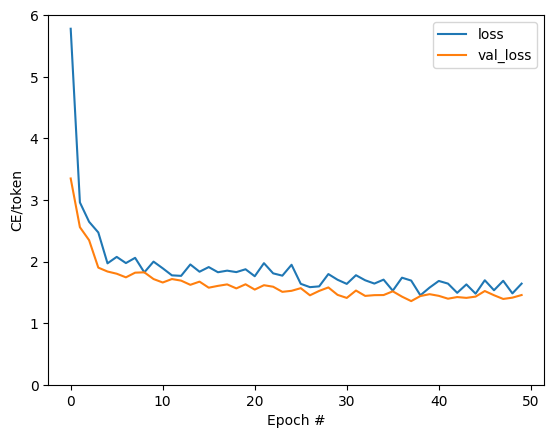

In [119]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch #')
plt.ylabel('CE/token')
plt.legend()

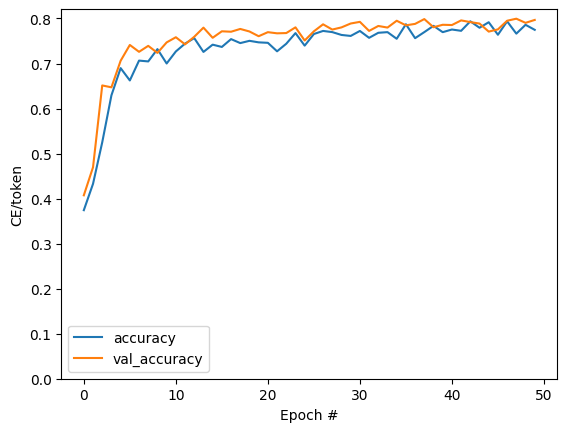

In [120]:
plt.plot(history.history['masked_acc'], label='accuracy')
plt.plot(history.history['val_masked_acc'], label='val_accuracy')
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch #')
plt.ylabel('CE/token')
plt.legend()

### Translate

Now that the model is trained, implement a function to execute the full `text => text` translation. This code is basically identical to the [inference example](#inference) in the [decoder section](#the_decoder), but this also captures the attention weights.

In [121]:
#@title
@Translator.add_method
def translate(self,
              texts, *,
              max_length=50,
              temperature=0.0):
  # Process the input texts
  context = self.encoder.convert_input(texts)
  batch_size = tf.shape(texts)[0]
  

  # Setup the loop inputs
  tokens = []
  attention_weights = []
  next_token, done, state = self.decoder.get_initial_state(context)

  for _ in range(max_length):
    # Generate the next token
    next_token, done, state = self.decoder.get_next_token(
        context, next_token, done,  state, temperature)
        
    # Collect the generated tokens
    tokens.append(next_token)
    attention_weights.append(self.decoder.last_attention_weights)
    
    if tf.executing_eagerly() and tf.reduce_all(done):
      break

  # Stack the lists of tokens and attention weights.
  tokens = tf.concat(tokens, axis=-1)   # t*[(batch 1)] -> (batch, t)
  self.last_attention_weights = tf.concat(attention_weights, axis=1)  # t*[(batch 1 s)] -> (batch, t s)

  result = self.decoder.tokens_to_text(tokens)
  return result

Here are the two helper methods, used above, to convert tokens to text, and to get the next token:

In [122]:
#musician
#ᓂᔾᔭᐅᓯᔭᖅᑎ
text="musician"

result = model.translate([text]) 
result[0].numpy().decode()


', [UNK] '

In [71]:
#ᑳᐱ
#coffee

text="ᑳᐱ"

result = model.translate([text]) 
result[0].numpy().decode()


'i have a lot . '

In [ ]:
#ᐃᕐᖑᓯᖅ
#cup,mug


text="ᐃᕐᖑᓯᖅ"

result = model.translate([text]) 
result[0].numpy().decode()


'cup mug '

In [ ]:
#ᐃᒪᓕᒃ
#contains a liquid (it...)

text="ᐃᒪᓕᒃ"

result = model.translate([text]) 
result[0].numpy().decode()



'contains a liquid it . . . '

In [ ]:
#"ᖃᔅᓯᓂᒃ ᐅᑭᐅᖃᖅᐱᑦ?" "ᖃᓄᐃᒻᒪᑦ ᖃᐅᔨᔪᒪᕕᑦ?"
#"How old are you?" "Why do you want to know?"

text='"ᖃᔅᓯᓂᒃ ᐅᑭᐅᖃᖅᐱᑦ?" "ᖃᓄᐃᒻᒪᑦ ᖃᐅᔨᔪᒪᕕᑦ?"'

result = model.translate([text]) 
result[0].numpy().decode()



'how old are you ? why do you want to know ? '

In [123]:
class Export(tf.Module):
  def __init__(self, model):
    self.model = model

  @tf.function(input_signature=[tf.TensorSpec(dtype=tf.string, shape=[None])])
  def translate(self, inputs):
    return self.model.translate(inputs)

In [124]:
export = Export(model)

In [125]:
tf.saved_model.save(export, 'translator_english',
                    signatures={'serving_default': export.translate})

INFO:tensorflow:Assets written to: translator_english\assets


INFO:tensorflow:Assets written to: translator_english\assets


In [126]:
# model.save('/content/drive/MyDrive/Text to Text/model_trained')

In [127]:
reloaded = tf.saved_model.load('translator_english')

In [128]:
#ᐃᕐᖑᓯᖅ
#cup,mug


text=" Tom has betrayed me."

result = reloaded.translate([text]) 
result[0].numpy().decode()

', ᑖᒻ , [UNK]                                              '

In [61]:
df['English']

0                                                    hello
1                 "A" is the first letter of the alphabet.
2               "Are those your books?" "No, they aren't."
3            "Are you from Australia?" asked the Filipino.
4        "Could you move over a little?" "Oh, sorry. I ...
                               ...                        
71174                       Tom has begun to learn French.
71175                    Tom has begun writing a new book.
71176                                 Tom has betrayed me.
71177                                 Tom has betrayed us.
71178                                    Tom has big ears.
Name: English, Length: 71179, dtype: object